# 数据处理

In [1]:
# 导入python常用包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

# 导入数据
df0 = pd.read_csv('jiazaishanghai.csv')

In [2]:
# 查看数据
df0.head()

,Unnamed: 0,district,complex_name,rental_period,use_type,building_type,floor,layout,sqmeters,address,price,amenities,descript
0,0,静安-南京西路,静安华庭上海壹街区,长租,住宅,新公寓,*/32层,2室2厅2卫,110平米,家在上海大田路158弄静安华庭一街区,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']","['2房2厅2卫', '1书房', '外阳台', '小楼王', '前后看花园', '视野开阔..."
1,1,静安-南京西路,上海壹街区,长租,住宅,新公寓,*/32层,2室2厅2卫,110平米,家在上海上海壹街区-凤阳路588弄27号3101,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']","['2房2厅2卫', '书房', '外阳台', '小楼王', '前后看花园', '视野开阔'..."
2,2,徐汇-老法租界,襄乐大厦,长租,住宅,新公寓,*/24层,4室2厅2卫,170平米,家在上海襄阳北路47号23E,33000.0,"['暖气', '浴缸', '空调', '独卫', '阳台']","['全屋地暖', '中央空调', '开放式厨房', '中岛', '烤箱', '洗碗机', '..."
3,3,长宁-江苏路,NaN,长租,住宅,老公寓,*/5层,1室1厅1卫,40平米,家在上海愚园路1293弄23号202,7800.0,"['', '空调', '', '', '', '']","['精装修', '全新', '精致设计']"
4,4,徐汇-老法租界,兴顺东里,长租,住宅,新式里弄,*/3层,1室1厅1卫,29平米,家在上海永康路37弄32号二楼朝南间,5500.0,"['暖气', '空调', '浴缸', '', '']","['永康路37弄', '32号2楼朝南正间', '可从嘉善路兴顺东里小区入口进', '看房随..."


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17204 entries, 0 to 17203
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17204 non-null  int64  
 1   district       17204 non-null  object 
 2   complex_name   15055 non-null  object 
 3   rental_period  17204 non-null  object 
 4   use_type       17176 non-null  object 
 5   building_type  15126 non-null  object 
 6   floor          17204 non-null  object 
 7   layout         17204 non-null  object 
 8   sqmeters       17204 non-null  object 
 9   address        17204 non-null  object 
 10  price          17204 non-null  float64
 11  amenities      17204 non-null  object 
 12  descript       17204 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.7+ MB


In [4]:
# 去除重复项
df = df0.drop_duplicates().copy()

# 取出数据中要用来分析的列
columns = ['district', 'use_type', 'building_type', 'floor', 'layout', 'sqmeters', 'price', 'amenities']
df = df[columns]

In [5]:
df.head()

,district,use_type,building_type,floor,layout,sqmeters,price,amenities
0,静安-南京西路,住宅,新公寓,*/32层,2室2厅2卫,110平米,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']"
1,静安-南京西路,住宅,新公寓,*/32层,2室2厅2卫,110平米,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']"
2,徐汇-老法租界,住宅,新公寓,*/24层,4室2厅2卫,170平米,33000.0,"['暖气', '浴缸', '空调', '独卫', '阳台']"
3,长宁-江苏路,住宅,老公寓,*/5层,1室1厅1卫,40平米,7800.0,"['', '空调', '', '', '', '']"
4,徐汇-老法租界,住宅,新式里弄,*/3层,1室1厅1卫,29平米,5500.0,"['暖气', '空调', '浴缸', '', '']"


## 数值型数据处理
### 楼层

In [6]:
# 移除*/0层的数据
df = df[df['floor'] != '*/0层']

# 将楼层信息转换成数值格式
# 为了方便移除异常楼层信息，先把‘整栋’换为0来表示
def get_floor(x):
    if '*/' in x:
        return int(x[2:-1])
    else:
        return 0

df['floor'] = df.floor.apply(get_floor)

# 移除80层以上的数据
df = df[df['floor']<80]

# 再将0替换成‘整栋’
df.loc[df['floor']==0, ['floor']] = '整栋'

In [7]:
df['floor'].unique()

array([32, 24, 5, 3, 20, 31, 55, 16, 8, '整栋', 23, 9, 15, 6, 36, 35, 25,
       12, 28, 4, 14, 29, 30, 10, 2, 22, 37, 21, 7, 18, 39, 1, 13, 26, 45,
       17, 38, 33, 11, 27, 42, 34, 19, 40, 43, 50, 48, 49, 47, 56, 52, 46,
       53, 62, 60, 51, 41, 63], dtype=object)

### 面积

In [8]:
# 将面积信息转换成数值格式
def get_sqmeters(x):
    return int(x[:-2])

df['sqmeters'] = df.sqmeters.apply(get_sqmeters)

# 移除3平米以下和1500平米以上的数据
df = df[(df['sqmeters']>3)&(df['sqmeters']<1500)]

In [9]:
df.head()

,district,use_type,building_type,floor,layout,sqmeters,price,amenities
0,静安-南京西路,住宅,新公寓,32,2室2厅2卫,110,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']"
1,静安-南京西路,住宅,新公寓,32,2室2厅2卫,110,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']"
2,徐汇-老法租界,住宅,新公寓,24,4室2厅2卫,170,33000.0,"['暖气', '浴缸', '空调', '独卫', '阳台']"
3,长宁-江苏路,住宅,老公寓,5,1室1厅1卫,40,7800.0,"['', '空调', '', '', '', '']"
4,徐汇-老法租界,住宅,新式里弄,3,1室1厅1卫,29,5500.0,"['暖气', '空调', '浴缸', '', '']"


### 租金

In [10]:
# 计算每平米的租金
df['price_sqmeter'] = (df['price'] / df['sqmeters']).round(1)

# 移除租金低于300和租金高于150000的数据
df = df[(df['price']>300)&(df['price']<150000)]

# 移除租金低于10元/平米和租金高于800元/平米的数据
df = df[(df['price_sqmeter']>10)&(df['price_sqmeter']<800)]

In [11]:
df.head()

,district,use_type,building_type,floor,layout,sqmeters,price,amenities,price_sqmeter
0,静安-南京西路,住宅,新公寓,32,2室2厅2卫,110,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']",269.1
1,静安-南京西路,住宅,新公寓,32,2室2厅2卫,110,29600.0,"['暖气', '浴缸', '户外空间', '空调', '独卫', '阳台', 'WIFI']",269.1
2,徐汇-老法租界,住宅,新公寓,24,4室2厅2卫,170,33000.0,"['暖气', '浴缸', '空调', '独卫', '阳台']",194.1
3,长宁-江苏路,住宅,老公寓,5,1室1厅1卫,40,7800.0,"['', '空调', '', '', '', '']",195.0
4,徐汇-老法租界,住宅,新式里弄,3,1室1厅1卫,29,5500.0,"['暖气', '空调', '浴缸', '', '']",189.7


## 文本型数据处理
### 区域

In [12]:
df['district'].unique()

array(['静安-南京西路', '徐汇-老法租界', '长宁-江苏路', '黄浦-人民广场', '长宁-中山公园', '浦东-陆家嘴',
       '浦东-三林', '徐汇-徐家汇', '徐汇-斜土路', '长宁-天山', '徐汇-建国西路', '长宁-新华路',
       '静安-新闸路', '徐汇-肇嘉浜路', '黄浦-打浦桥', '静安-其他', '普陀-长寿路', '黄浦-新天地 ',
       '杨浦-新江湾城', '静安-静安寺', '黄浦-五里桥', '黄浦-黄浦滨江', '虹口-江湾镇', '闵行-其他',
       '静安-曹家渡', '徐汇-田林', '长宁-镇宁路', '徐汇-万体馆', '静安-江宁路', '长宁-古北',
       '黄浦-淮海中路', '黄浦-老西门', '黄浦-西藏南路', '浦东-张江', '闵行-莘庄', '杨浦-鞍山', '黄浦-豫园',
       '徐汇-衡山路', '浦东-塘桥', '徐汇-龙华', '闵行-吴泾', '普陀-光新', '浦东-花木', '黄浦-董家渡',
       '浦东-唐镇', '静安-不夜城', '浦东-祝桥', '浦东-北蔡', '虹口-鲁迅公园', '黄浦-其他', '浦东-世博',
       '长宁-其他', '闵行', '普陀-武宁', '奉贤-海湾', '普陀-中远两湾城', '浦东-南码头', '徐汇-交大',
       '长宁-西郊', '静安-北京西路', '徐汇-其他', '浦东-金桥', '黄浦-蓬莱公园', '徐汇-徐汇滨江',
       '闵行-颛桥', '嘉定-菊园新区', '浦东-源深', '长宁-虹桥', '普陀-其他', '徐汇-漕河泾', '杨浦-五角场',
       '宝山-大场镇', '松江-佘山', '虹口-北外滩', '虹口-四川北路', '黄浦-世博滨江', '普陀-真光',
       '宝山-大华', '松江-新桥', '虹口-其他', '普陀-曹杨', '闵行-龙柏', '浦东-杨东', '普陀-真如',
       '普陀-长风', '浦东-联洋', '普陀-桃浦', '长宁-北新泾', '松江-泗泾', '青浦-白鹤', '闵行-华漕',
       '嘉定-嘉定新城', '奉贤-

In [13]:
# 移除区域信息中值为2100的异常数据
df = df[df['district']!='2100']

# 将district的两部分分开，取前面部分的静安、徐汇等区域
def get_district(x):
    return x.split('-')[0]

df['district'] = df.district.apply(get_district)

In [14]:
df['district'].unique()

array(['静安', '徐汇', '长宁', '黄浦', '浦东', '普陀', '杨浦', '虹口', '闵行', '奉贤', '嘉定',
       '宝山', '松江', '青浦', '闸北'], dtype=object)

### 建筑类型和使用类型

In [15]:
# 查看建筑类型和使用类型有哪些
print(df['building_type'].unique())
print(df['use_type'].unique())

['新公寓' '老公寓' '新式里弄' '老洋房' '老公房' nan '别墅']
['住宅' '工作室' '商用' '住宅/工作室' '商铺' nan '写字楼' '厂房/仓库']


In [16]:
# 建筑类型中有一些空值，把这部分的数据改为‘未知’,方便后面分析
df['building_type'] = df['building_type'].fillna(value='未知')

# 使用类型中有一些空值，把这部分的数据改为‘未知’，方便后面分析
df['use_type'] = df['use_type'].fillna(value='未知')

In [17]:
# 把商用和商铺这两种类型合并为商铺
df.loc[df['use_type']=='商用', ['use_type']] = '商铺'

In [18]:
print(df['building_type'].unique())
print(df['use_type'].unique())

['新公寓' '老公寓' '新式里弄' '老洋房' '老公房' '未知' '别墅']
['住宅' '工作室' '商铺' '住宅/工作室' '未知' '写字楼' '厂房/仓库']


### 房屋设施

In [19]:
# 将原始数据amenities列中的各种设施提取出来，放入单独的列(暖气、空调等)，方便后面分析
amenities = ['heat', 'ac', 'balcony', 'wifi', 'outdoor_space', 'bathtub']
amenities2 = ['暖气', '空调', '阳台', 'WIFI', '户外空间', '浴缸']

i = 0

for item in amenities:
    
    def get_result(x):
        if amenities2[i] in x:
            return 1
        else:
            return 0
    
    df[item] = df.amenities.apply(get_result)
    i += 1

# 计算每个房屋的设施总数量
df['amenities_sum'] = df[['heat','ac', 'balcony', 'wifi', 'outdoor_space', 'bathtub']].sum(axis=1)

In [20]:
# 移除原始的amenities列
df = df.drop('amenities', axis=1)

# 查看处理完的数据
df.head()

,district,use_type,building_type,floor,layout,sqmeters,price,price_sqmeter,heat,ac,balcony,wifi,outdoor_space,bathtub,amenities_sum
0,静安,住宅,新公寓,32,2室2厅2卫,110,29600.0,269.1,1,1,1,1,1,1,6
1,静安,住宅,新公寓,32,2室2厅2卫,110,29600.0,269.1,1,1,1,1,1,1,6
2,徐汇,住宅,新公寓,24,4室2厅2卫,170,33000.0,194.1,1,1,1,0,0,1,4
3,长宁,住宅,老公寓,5,1室1厅1卫,40,7800.0,195.0,0,1,0,0,0,0,1
4,徐汇,住宅,新式里弄,3,1室1厅1卫,29,5500.0,189.7,1,1,0,0,0,1,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16739 entries, 0 to 17203
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   district       16739 non-null  object 
 1   use_type       16739 non-null  object 
 2   building_type  16739 non-null  object 
 3   floor          16739 non-null  object 
 4   layout         16739 non-null  object 
 5   sqmeters       16739 non-null  int64  
 6   price          16739 non-null  float64
 7   price_sqmeter  16739 non-null  float64
 8   heat           16739 non-null  int64  
 9   ac             16739 non-null  int64  
 10  balcony        16739 non-null  int64  
 11  wifi           16739 non-null  int64  
 12  outdoor_space  16739 non-null  int64  
 13  bathtub        16739 non-null  int64  
 14  amenities_sum  16739 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 2.0+ MB


# 数据分析
### 区域

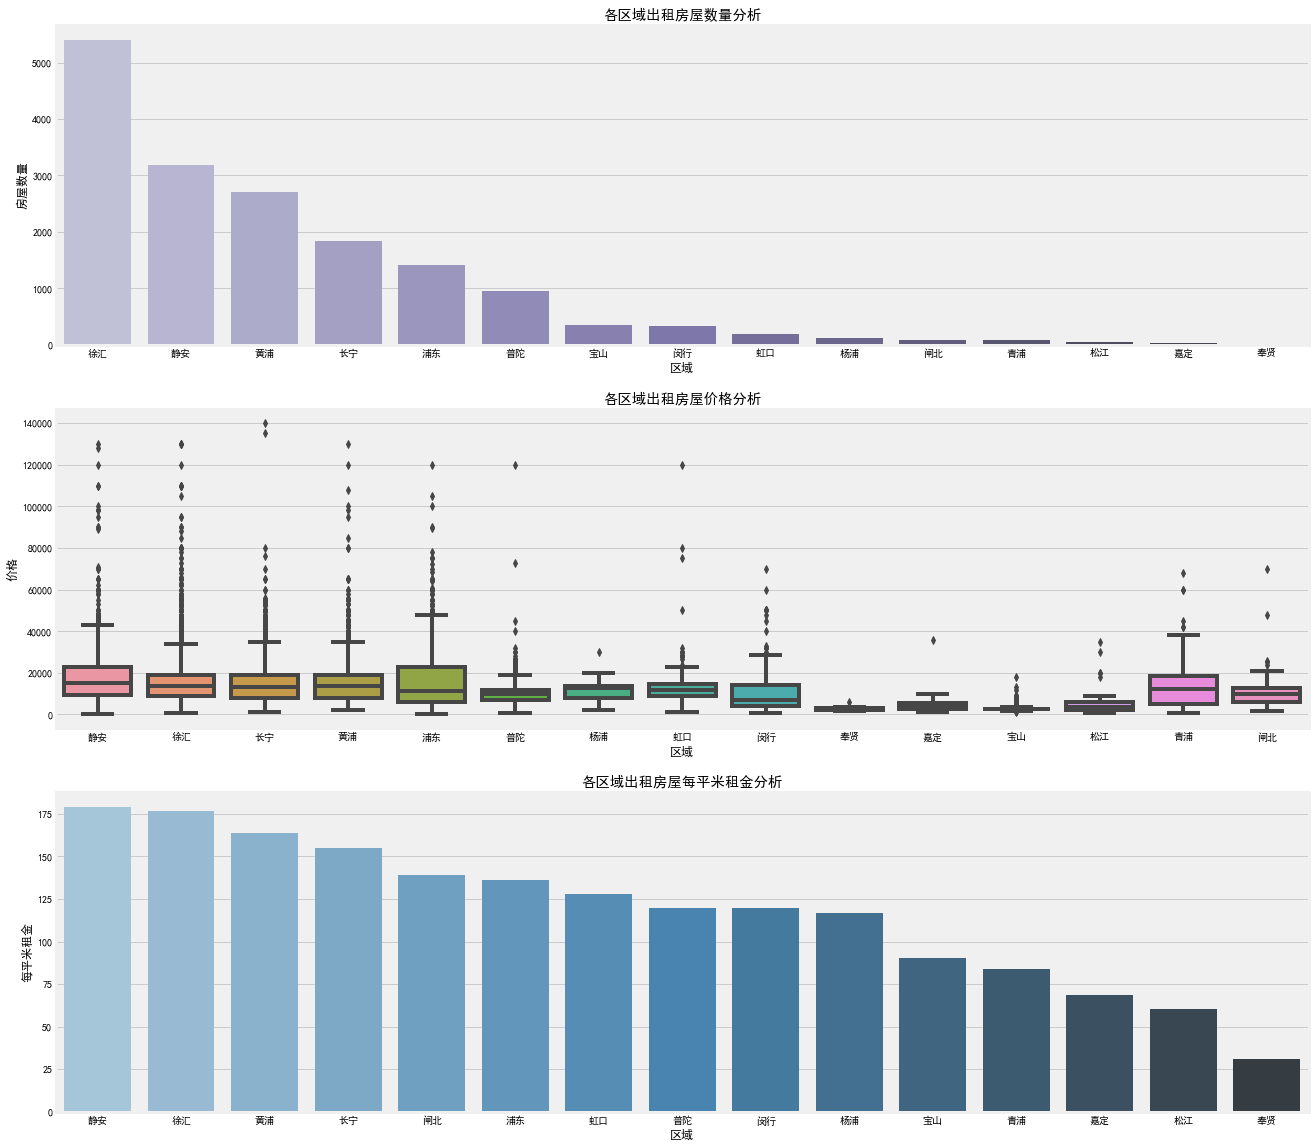

In [22]:
# 各区域出租房屋数量分析
# 各区域出租房屋价格分析
# 各区域出租房屋每平米租金分析

df_count = df['price'].groupby(df['district']).count().sort_values(ascending=False).to_frame().reset_index()
df_price = df['price_sqmeter'].groupby(df['district']).mean().sort_values(ascending=False).to_frame().reset_index()

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20, 20))
sns.barplot(x='district', y='price', palette='Purples_d', data=df_count, ax=ax1)
ax1.set_title('各区域出租房屋数量分析')
ax1.set_xlabel('区域')
ax1.set_ylabel('房屋数量')

sns.boxplot(x='district', y='price', data=df, ax=ax2)
ax2.set_title('各区域出租房屋价格分析')
ax2.set_xlabel('区域')
ax2.set_ylabel('价格')

sns.barplot(x='district', y='price_sqmeter', palette='Blues_d', data=df_price, ax=ax3)
ax3.set_title('各区域出租房屋每平米租金分析')
ax3.set_xlabel('区域')
ax3.set_ylabel('每平米租金')

plt.show()

### 面积

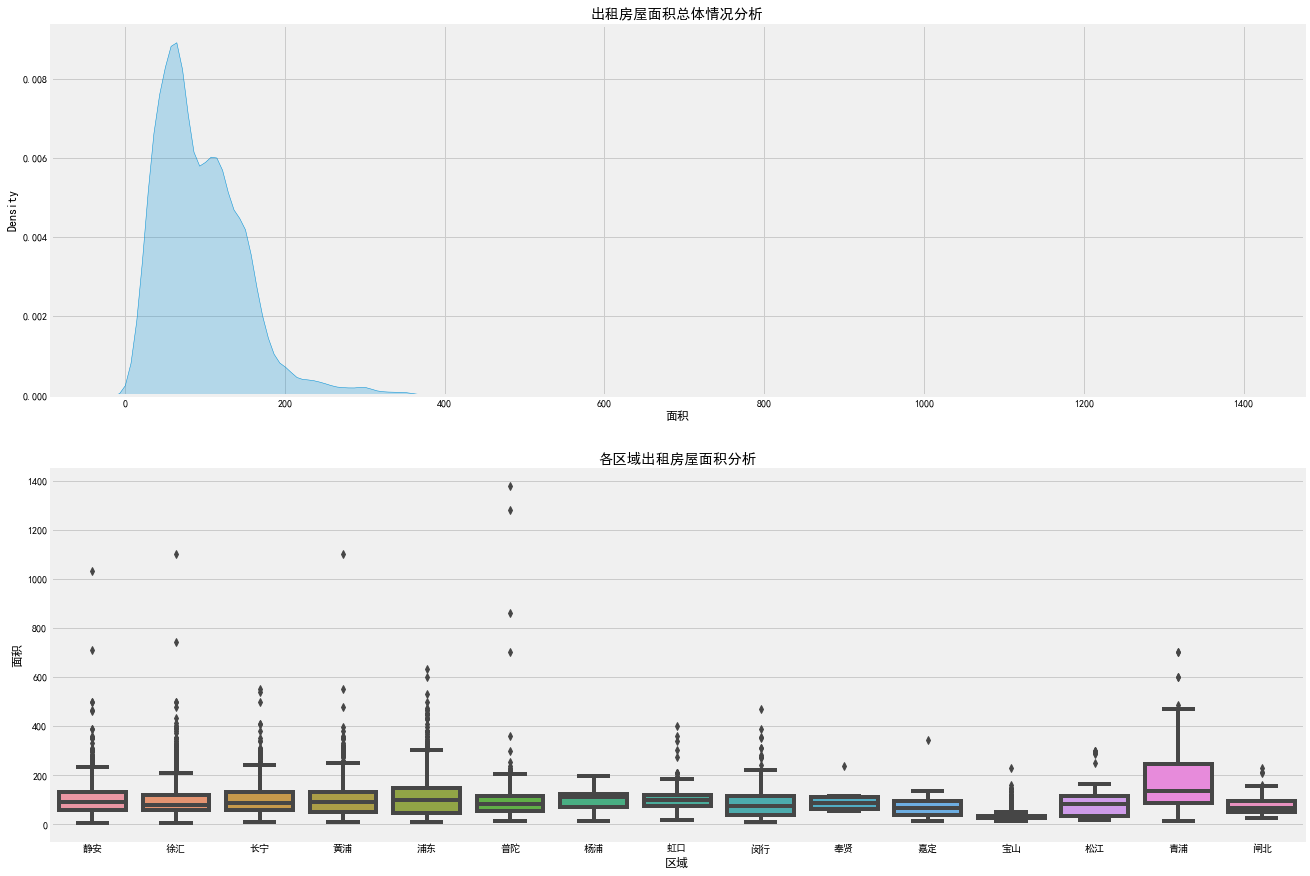

In [23]:
# 出租房屋面积总体情况分析
# 各区域出租房屋面积分析

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(20, 15))

sns.kdeplot(df['sqmeters'], shade=True, label='面积', ax=ax1)
ax1.set_title('出租房屋面积总体情况分析')
ax1.set_xlabel('面积')

sns.boxplot(x='district', y='sqmeters', data=df, ax=ax2)
ax2.set_title('各区域出租房屋面积分析')
ax2.set_xlabel('区域')
ax2.set_ylabel('面积')

plt.show()

### 户型

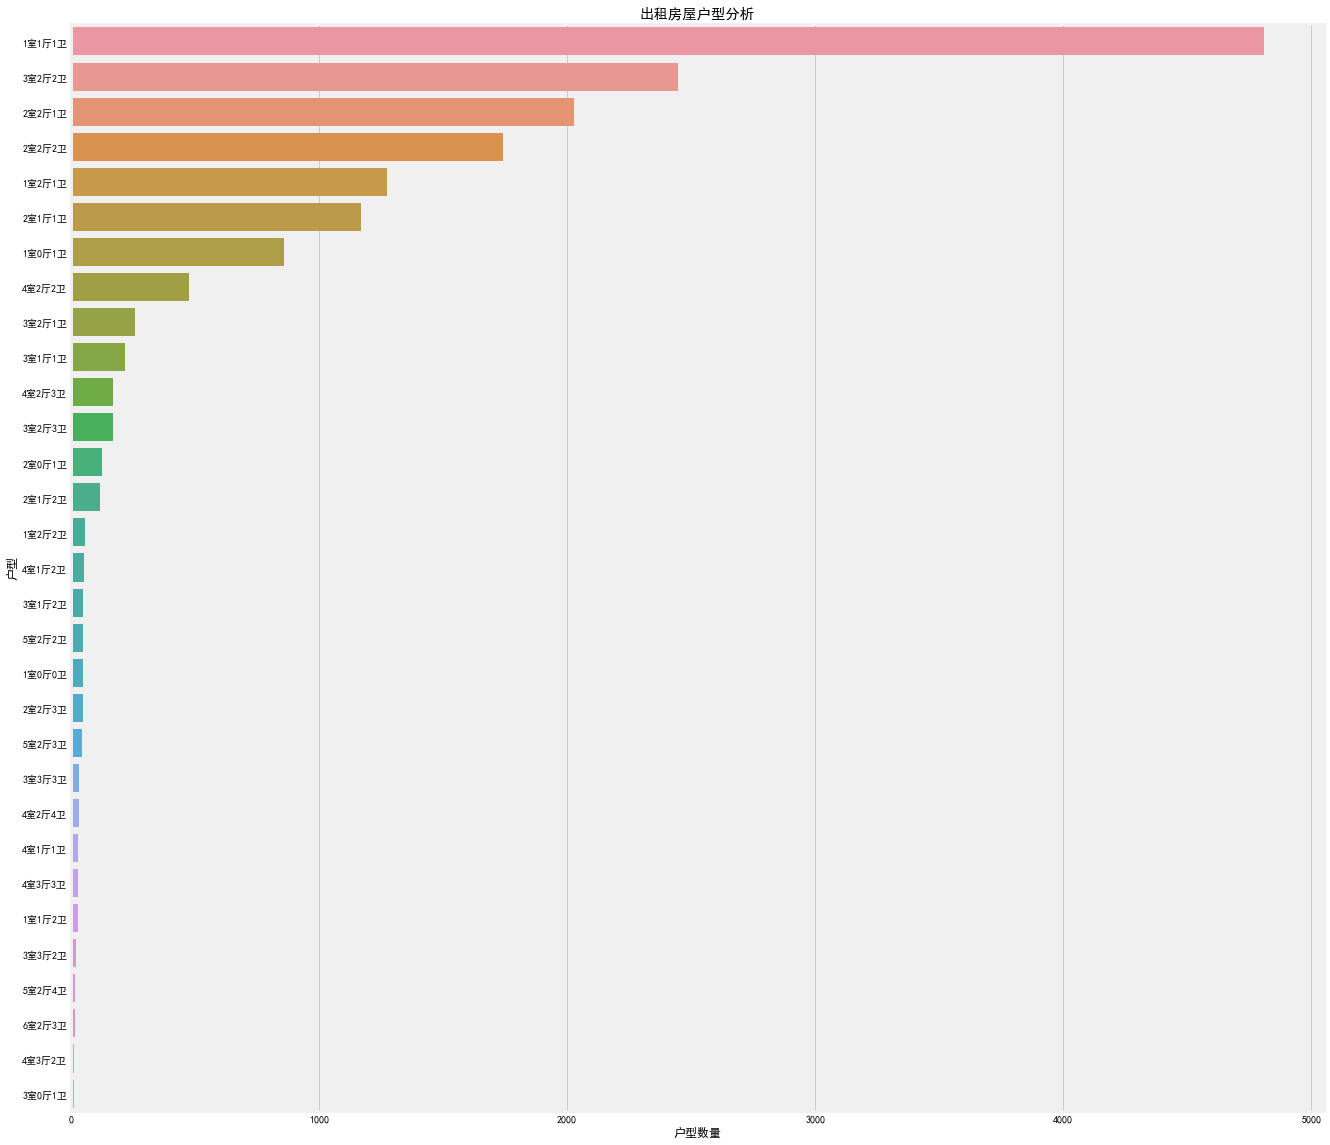

In [24]:
# 出租房屋户型情况分析，列出了主要的前30种户型的数量
fig, ax1 = plt.subplots(figsize=(20, 20))
sns.countplot(y='layout', order=df['layout'].value_counts().iloc[:31].index, data=df, ax=ax1)
ax1.set_title('出租房屋户型分析')
ax1.set_xlabel('户型数量')
ax1.set_ylabel('户型')
plt.show()

### 楼层

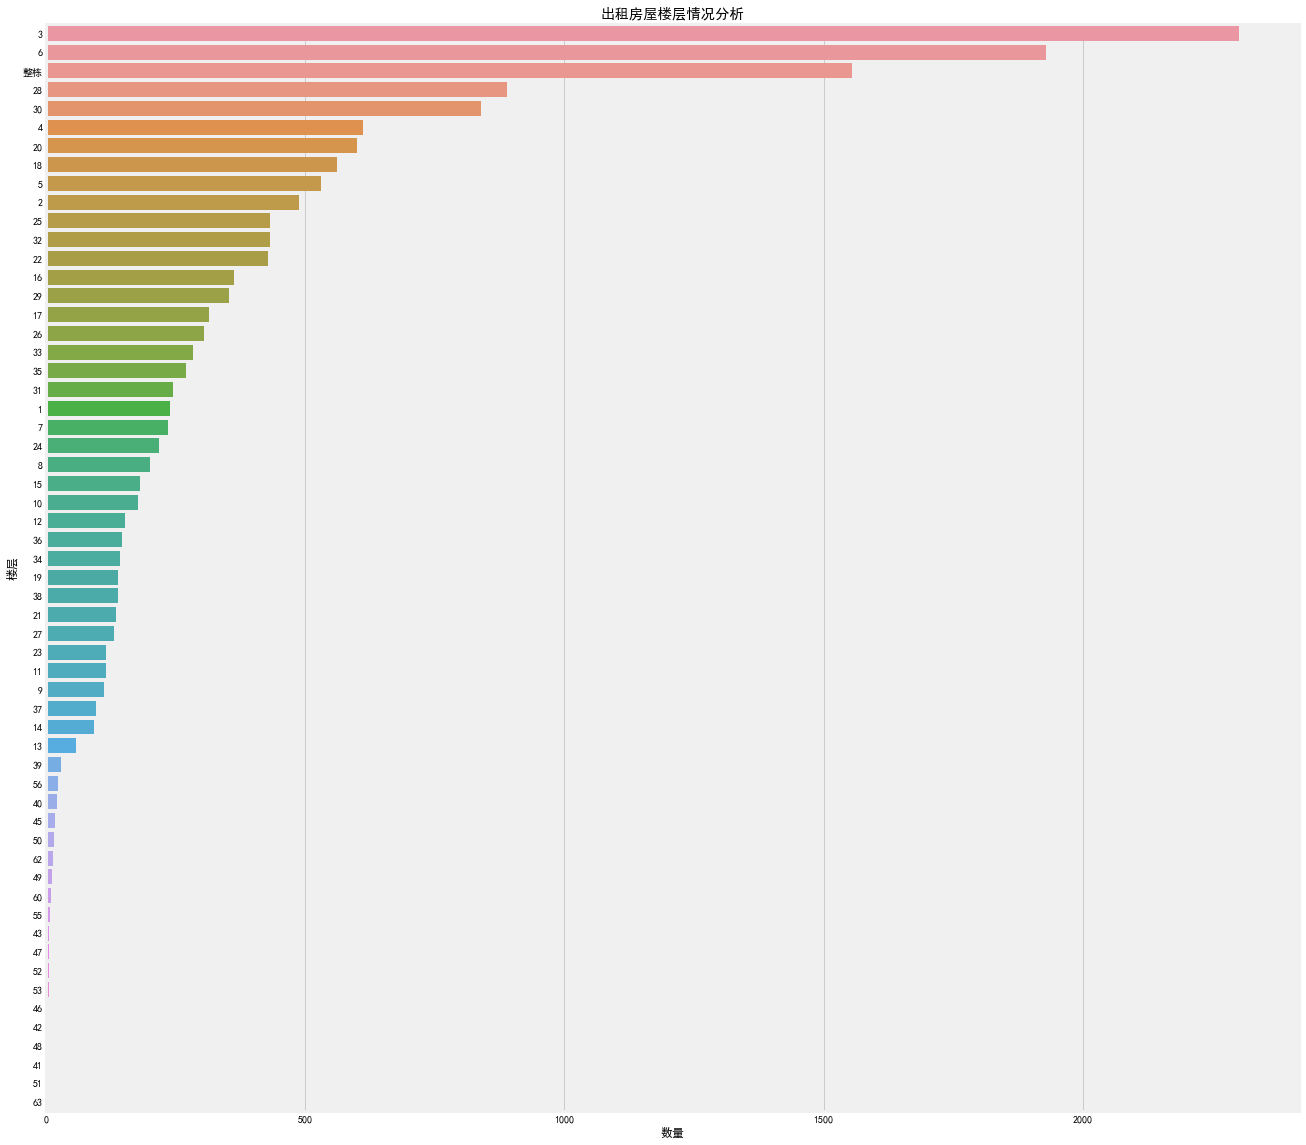

In [25]:
# 出租房屋楼层情况分析
fig, ax1 = plt.subplots(figsize=(20, 20))
sns.countplot(y='floor', order=df['floor'].value_counts().index, data=df, ax=ax1)
ax1.set_title('出租房屋楼层情况分析')
ax1.set_xlabel('数量')
ax1.set_ylabel('楼层')
plt.show()

### 建筑类型

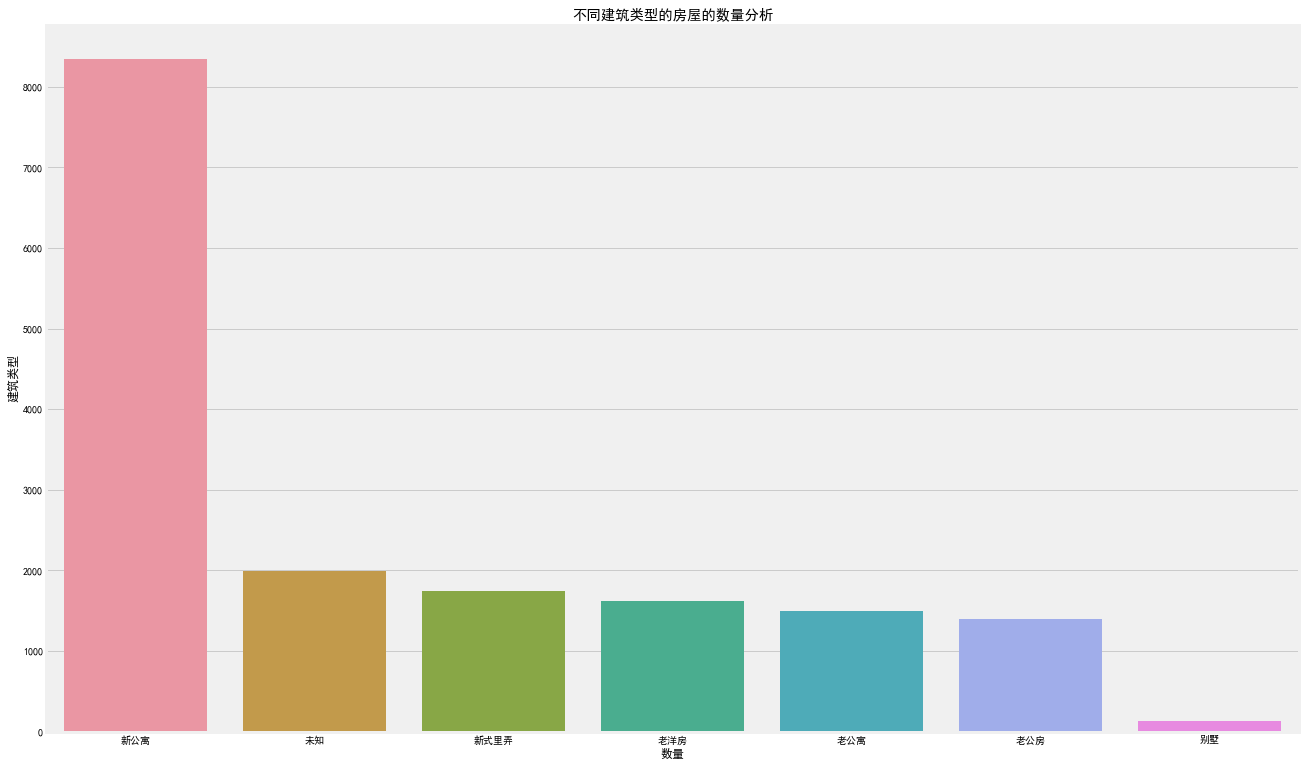

In [26]:
# 不同建筑类型的房屋各有多少
building_type_count = df['price'].groupby(df['building_type']).count().sort_values(ascending=False).to_frame().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 13))
sns.barplot(x='building_type', y='price', data=building_type_count, ax=ax1)
ax1.set_title('不同建筑类型的房屋的数量分析')
ax1.set_xlabel('数量')
ax1.set_ylabel('建筑类型')
plt.show()

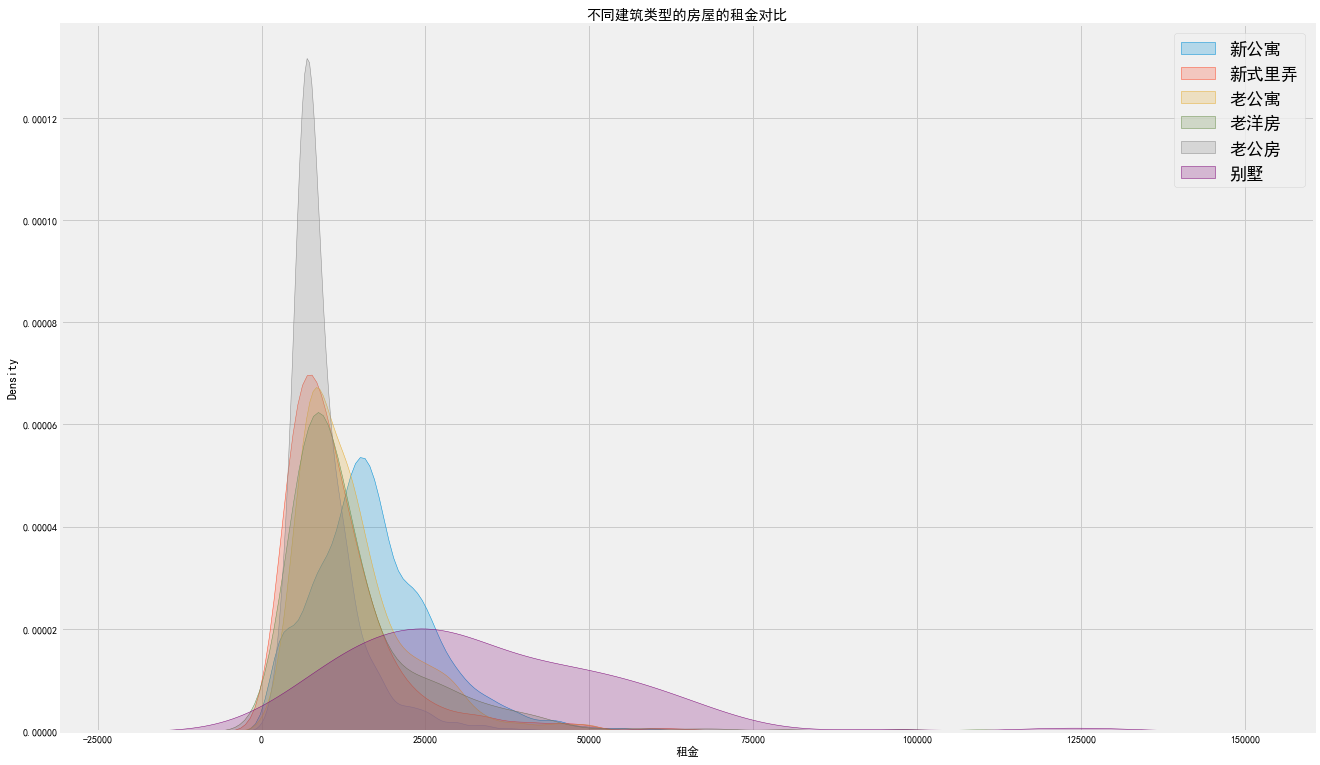

In [27]:
# 不同建筑类型的房屋的租金分析
fig, ax1 = plt.subplots(figsize=(20, 13))
sns.kdeplot(df[df['building_type']=='新公寓']['price'], shade=True, label='新公寓')
sns.kdeplot(df[df['building_type']=='新式里弄']['price'], shade=True, label='新式里弄')
sns.kdeplot(df[df['building_type']=='老公寓']['price'], shade=True, label='老公寓')
sns.kdeplot(df[df['building_type']=='老洋房']['price'], shade=True, label='老洋房')
sns.kdeplot(df[df['building_type']=='老公房']['price'], shade=True, label='老公房')
sns.kdeplot(df[df['building_type']=='别墅']['price'], shade=True, label='别墅')
ax1.set_title('不同建筑类型的房屋的租金对比')
ax1.set_xlabel('租金')
plt.legend(fontsize = 'xx-large')
plt.show()

### 使用类型

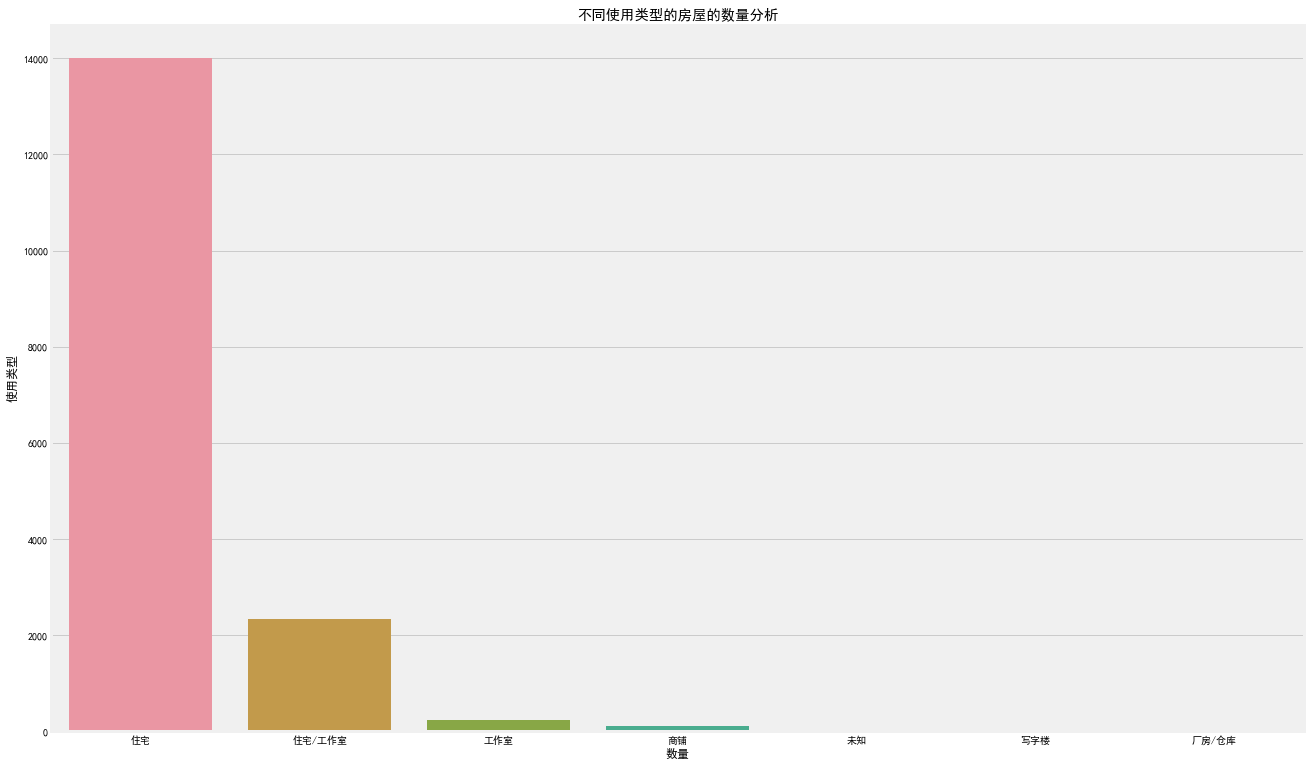

In [28]:
# 不同使用类型的房屋各有多少
use_type_count = df['price'].groupby(df['use_type']).count().sort_values(ascending=False).to_frame().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 13))
sns.barplot(x='use_type', y='price', data=use_type_count, ax=ax1)
ax1.set_title('不同使用类型的房屋的数量分析')
ax1.set_xlabel('数量')
ax1.set_ylabel('使用类型')
plt.show()

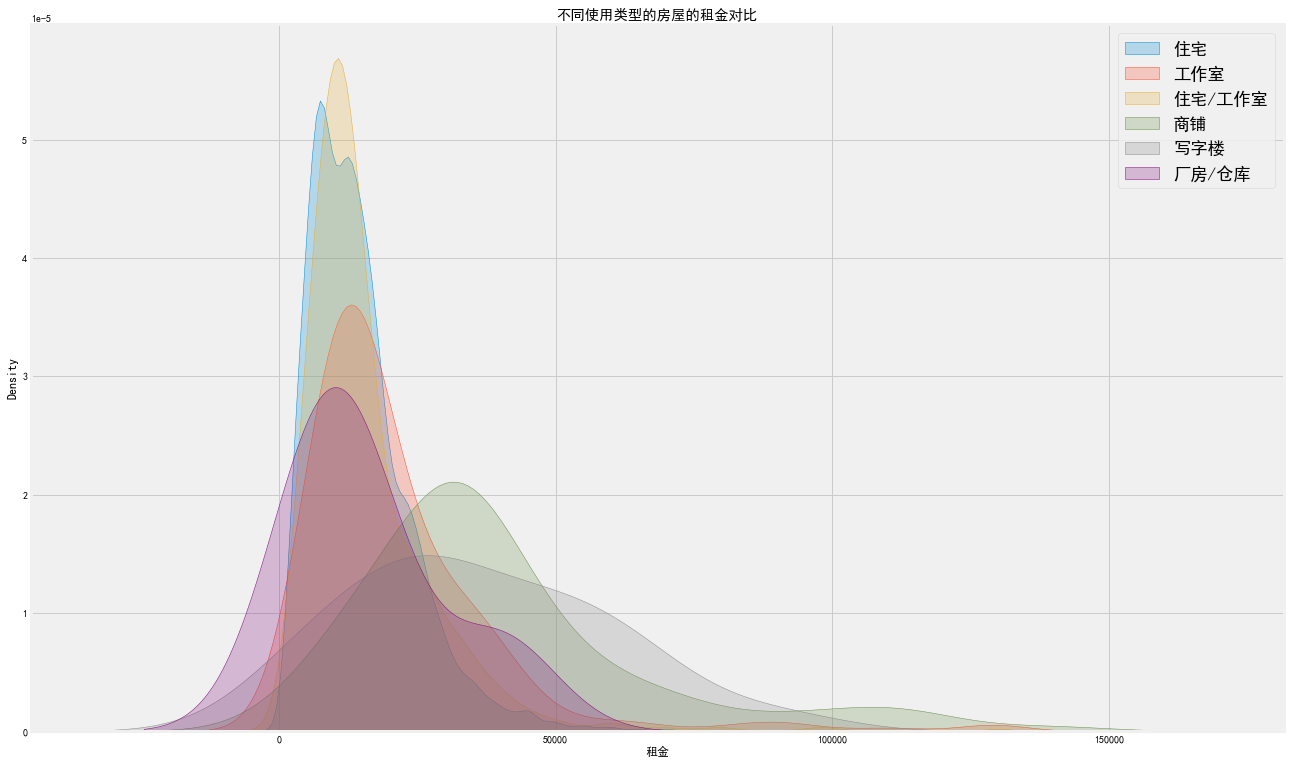

In [29]:
# 不同使用类型的房屋的租金分析
fig, ax1 = plt.subplots(figsize=(20, 13))
sns.kdeplot(df[df['use_type']=='住宅']['price'], shade=True, label='住宅')
sns.kdeplot(df[df['use_type']=='工作室']['price'], shade=True, label='工作室')
sns.kdeplot(df[df['use_type']=='住宅/工作室']['price'], shade=True, label='住宅/工作室')
sns.kdeplot(df[df['use_type']=='商铺']['price'], shade=True, label='商铺')
sns.kdeplot(df[df['use_type']=='写字楼']['price'], shade=True, label='写字楼')
sns.kdeplot(df[df['use_type']=='厂房/仓库']['price'], shade=True, label='厂房/仓库')
ax1.set_title('不同使用类型的房屋的租金对比')
ax1.set_xlabel('租金')
plt.legend(fontsize = 'xx-large')
plt.show()

### 房屋设施

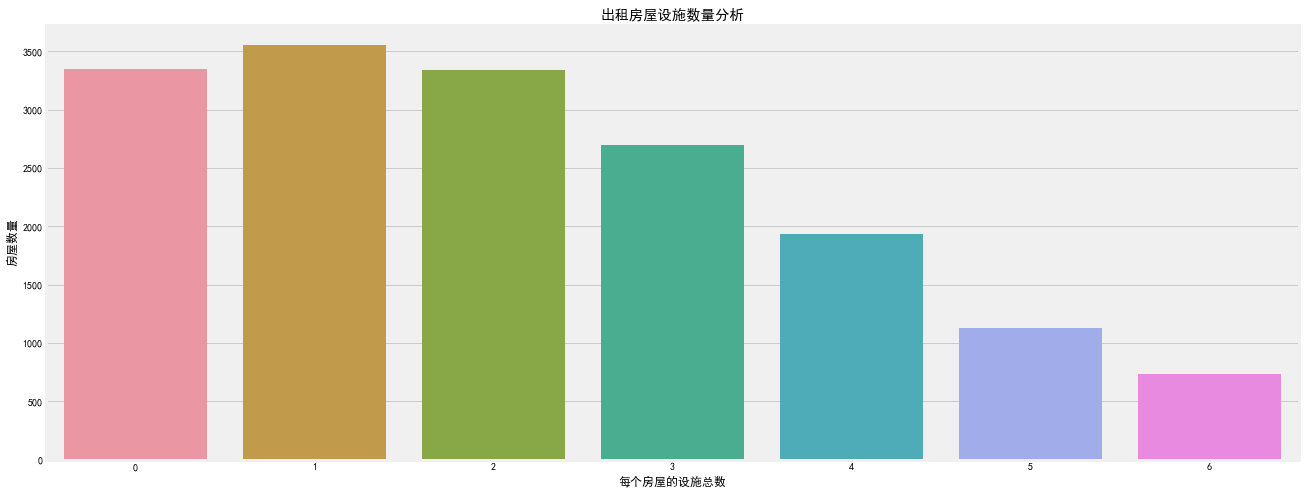

In [30]:
# 出租房屋设施数量分析
amenities_count = df['price'].groupby(df['amenities_sum']).count().to_frame().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 8))
sns.barplot(x='amenities_sum', y='price', data=amenities_count, ax=ax1)
ax1.set_title('出租房屋设施数量分析')
ax1.set_xlabel('每个房屋的设施总数')
ax1.set_ylabel('房屋数量')
plt.show()

In [31]:
# 出租房屋的设施情况分析
print(df['heat'].sum())
print(df['ac'].sum())
print(df['balcony'].sum())
print(df['wifi'].sum())
print(df['outdoor_space'].sum())
print(df['bathtub'].sum())

5286
10371
4866
3679
6315
5585


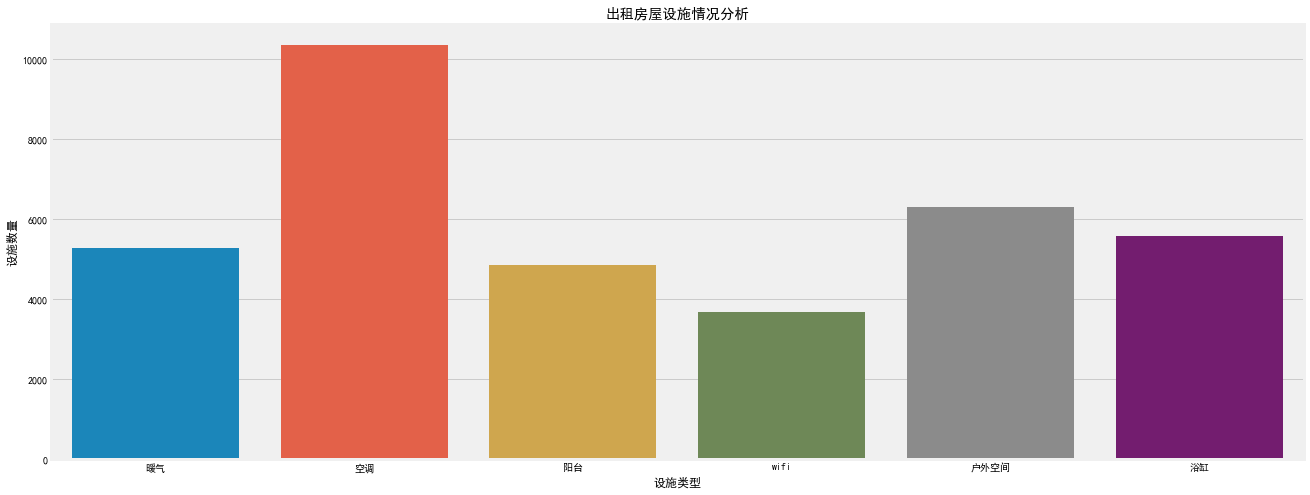

In [32]:
amenities = {'amenities':['暖气', '空调', '阳台', 'wifi', '户外空间', '浴缸'],
            'number':[5286, 10371, 4866, 3679, 6315, 5585]}

amenities_df = pd.DataFrame(amenities)

fig, ax1 = plt.subplots(figsize=(20, 8))
sns.barplot(x='amenities', y='number', data=amenities_df, ax=ax1)
ax1.set_title('出租房屋设施情况分析')
ax1.set_xlabel('设施类型')
ax1.set_ylabel('设施数量')
plt.show()